<a href="https://colab.research.google.com/github/AggelosRDio/MscMachineLearning/blob/main/ML2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 2


## Library imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from itertools import product
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

## Question 1

In [2]:
df = pd.read_csv('water_potability.csv')
df


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [3]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


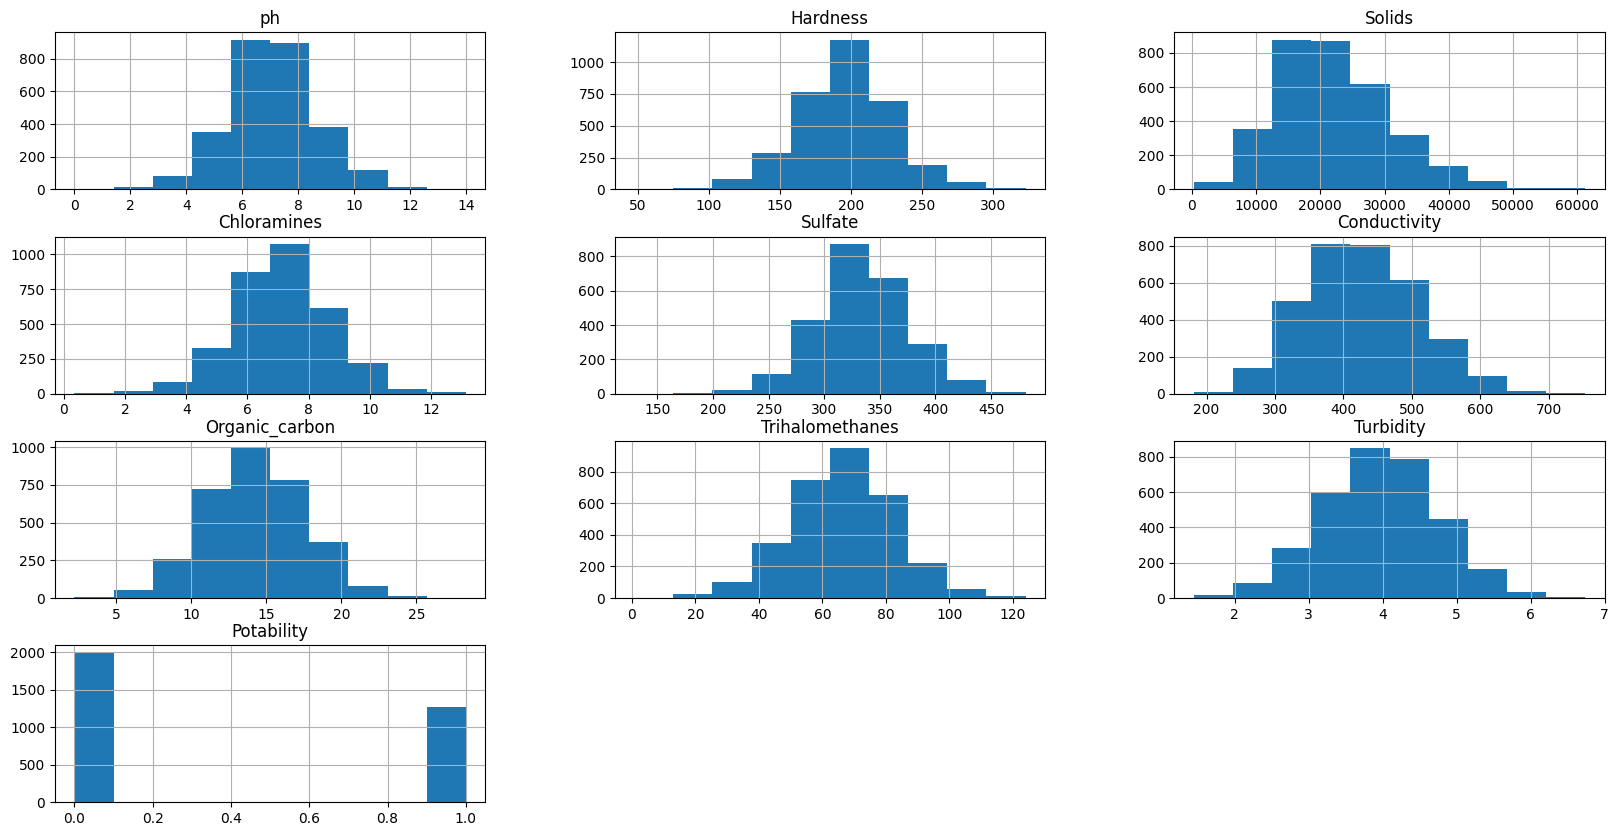

In [4]:
df.hist(figsize=(20,10))
plt.show()

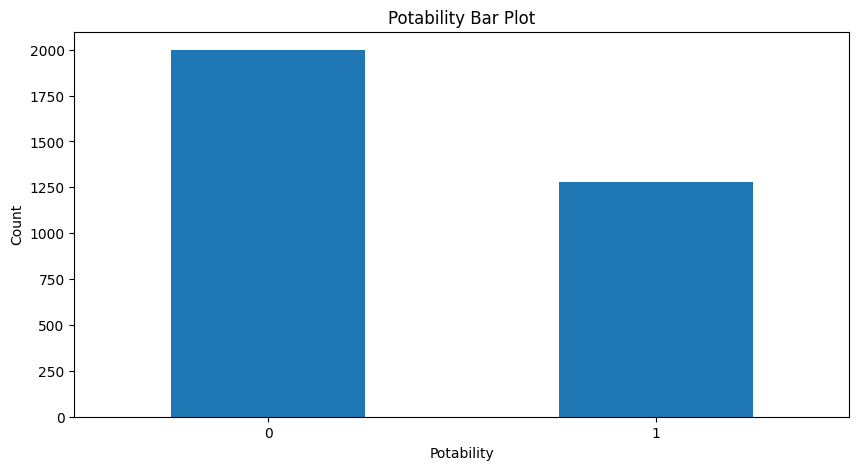

In [5]:
df['Potability'].value_counts().plot(kind = 'bar', figsize=(10,5), title = 'Potability Bar Plot', rot=0)
plt.ylabel('Count')
plt.xlabel('Potability')
plt.show()

In [6]:
missing = df.isnull().sum()
print(missing)

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64


Missing values in features "ph", "Sulfate" and "Trihalomethanes" can affect model accuracy as these values are important for predictions.

Furthermore there is imbalance betweem Potability examples of 0s and 1s.There are about 63% more examples of 0s as shown in the Potability Bar plot. This will make the model predict 0s more favourably over 1s as it is the more dominant class.

As such the data are considered to be of not good quality.

## Question 2

In [7]:
potability_percentages = []

ph_ranges = {
    '[0, 6.5)': df[df['ph'] < 6.5],
    '[6.5, 8.5]': df[(df['ph'] >= 6.5) & (df['ph'] <= 8.5)],
    '(8.5, 14]': df[df['ph'] > 8.5]
}

for ph_range, subset in ph_ranges.items():
    potability_percentage = round(subset['Potability'].value_counts(normalize=True) * 100,2)
    potable = potability_percentage.get(1, 0)
    non_potable = potability_percentage.get(0, 0)

    potability_percentages.append({
        'pH range': ph_range,
        'Potable %': potable,
        'Non-Potable %': non_potable
    })

potability_percentages_df = pd.DataFrame(potability_percentages)
potability_percentages_df

,pH range,Potable %,Non-Potable %
0,"[0, 6.5)",36.78,63.22
1,"[6.5, 8.5]",43.90,56.10
2,"(8.5, 14]",33.13,66.87


For pH range between 0 and 6.5 the potable examples are at 36.78% as opposed to 63.22% non-potable.

For pH range between 8.5 and 14 the potable examples are similar with 33.13% being potable and 66.87% non-potable.

For pH range of 6.5 to 8.5 the potable percentage increases slightly (41.78% potable) which seems to validate the assumption. However, there is still a 58.22% of examples where the water is not potable, which indicates that even though the pH value is an indicator of whether the water is potable or not, it is not enough by itself to classify it as either class

## Question 3

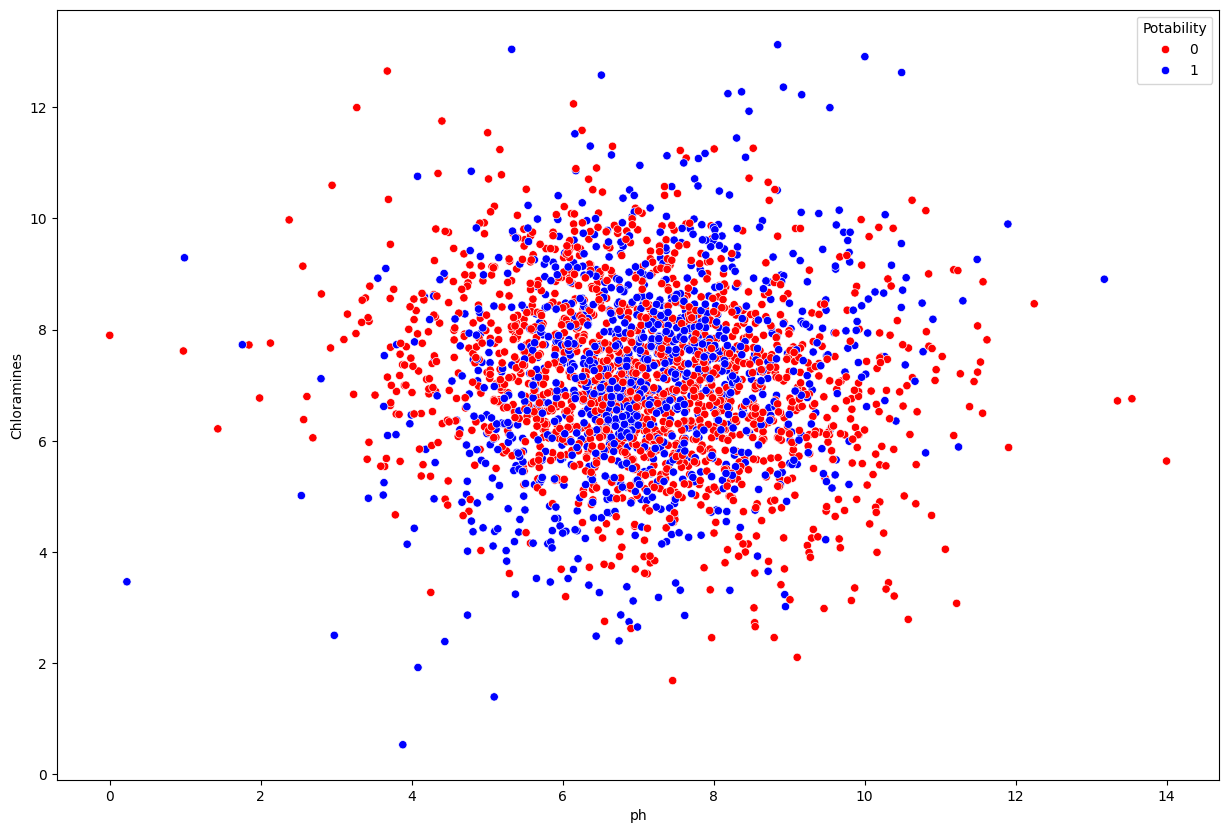

In [8]:
plt.figure(figsize=(15,10))
sns.scatterplot(data = df, x = 'ph', y = 'Chloramines', hue = 'Potability', palette={0: 'red', 1: 'blue'})
plt.show()

Based on the scatterplot red and blue dots seem to be overlapping. This indicates that Chloramines and PH alone are not enough to determine whether water is potable or not.

It's worth noting that even though the suggested level of chloramines is at 4ppm, there is a good number of blue dots over this value, meaning that this value alone is not the be-all/end-all when it comes to water potability.

## Question 4

In [9]:
df = df.fillna(df.mean()) # fill missing values based on mean
missing = df.isnull().sum()
print(missing)

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64


## Question 5

In [10]:
x = df.drop('Potability', axis=1).values
y = df['Potability'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

## Question 6

In [11]:
classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier.fit(x_train, y_train)

train_accuracy = accuracy_score(y_train, classifier.predict(x_train))
test_accuracy = accuracy_score(y_test, classifier.predict(x_test))

print(f'Train accuracy: {train_accuracy}')
print(f'Test accuracy: {test_accuracy}')

Train accuracy: 1.0
Test accuracy: 0.5778229908443541


## Question 7

In [12]:
parameter_table = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 3, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': [None, 'sqrt'],
    'ccp_alpha': [0, 0.01],
    'random_state': [0]
}

parameter_combinations = list(product(*parameter_table.values()))
paramemeter_names = list(parameter_table.keys())

results = []

for i, parameters in enumerate(parameter_combinations):

    parameters_dict = dict(zip(paramemeter_names, parameters))

    classifier = DecisionTreeClassifier(**parameters_dict)
    classifier.fit(x_train, y_train)

    train_accuracy = accuracy_score(y_train, classifier.predict(x_train))
    test_accuracy = accuracy_score(y_test, classifier.predict(x_test))

    results.append({
        'criterion': parameters_dict['criterion'],
        'max_depth': parameters_dict['max_depth'],
        'min_samples_split': parameters_dict['min_samples_split'],
        'min_samples_leaf': parameters_dict['min_samples_leaf'],
        'max_features': parameters_dict['max_features'],
        'ccp_alpha': parameters_dict['ccp_alpha'],
        'train_accuracy': train_accuracy,
        'test_accuracy': test_accuracy
    })

results_df = pd.DataFrame(results)
results_df


,criterion,max_depth,min_samples_split,min_samples_leaf,max_features,ccp_alpha,train_accuracy,test_accuracy
0,gini,NaN,2,1,None,0.00,1.000000,0.574771
1,gini,NaN,2,1,None,0.01,0.605321,0.620549
2,gini,NaN,2,1,sqrt,0.00,1.000000,0.622584
3,gini,NaN,2,1,sqrt,0.01,0.605321,0.620549
4,gini,NaN,2,2,None,0.00,0.951592,0.581892
...,...,...,...,...,...,...,...,...
91,entropy,5.0,5,1,sqrt,0.01,0.620148,0.626653
92,entropy,5.0,5,2,None,0.00,0.671173,0.655137
93,entropy,5.0,5,2,None,0.01,0.620148,0.626653
94,entropy,5.0,5,2,sqrt,0.00,0.642826,0.620549


## Question 8

In [13]:
best_max_depth = results_df[results_df['max_depth'] == 3].sort_values('test_accuracy', ascending=False).iloc[0]

print(best_max_depth)

criterion             entropy
max_depth                 3.0
min_samples_split           5
min_samples_leaf            1
max_features             None
ccp_alpha                 0.0
train_accuracy       0.641082
test_accuracy        0.639878
Name: 72, dtype: object


Best test accuracy is achieved with the combination of:

criterion             entropy
max_depth                 3.0
min_samples_split           5
min_samples_leaf            1
max_features             None
ccp_alpha                 0.0

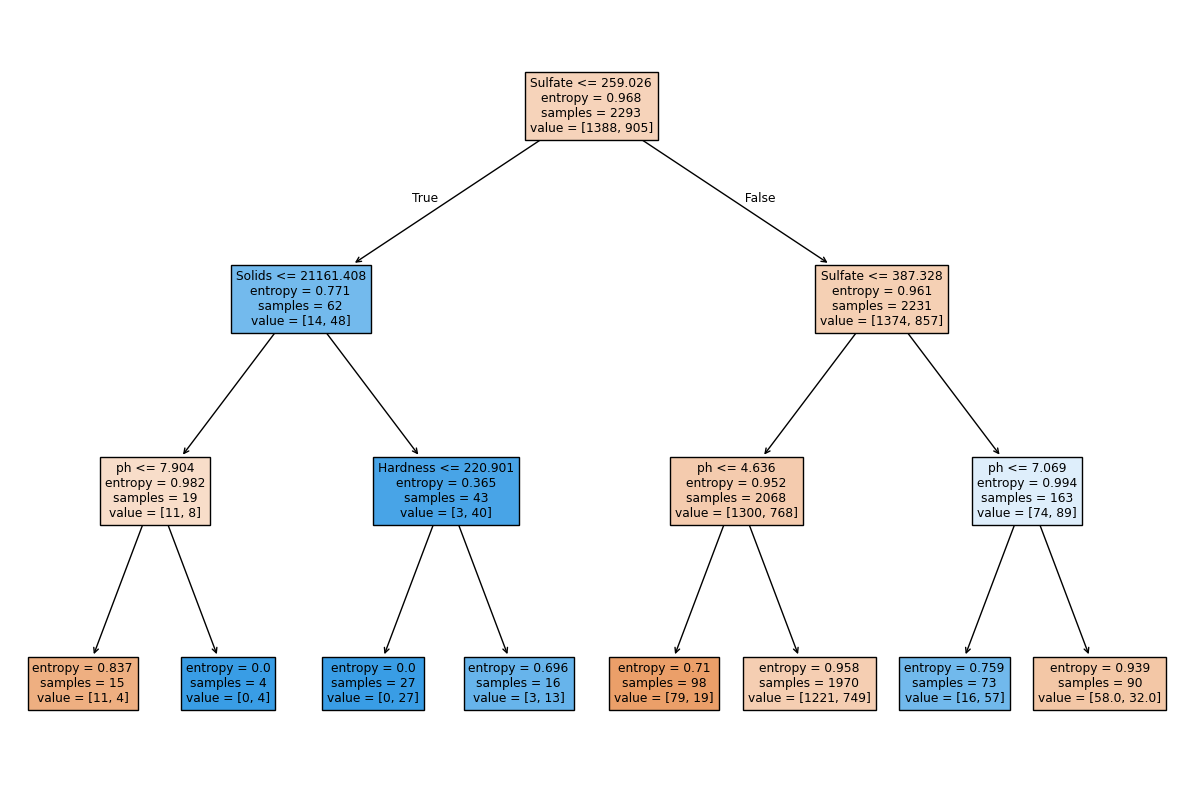

In [14]:
classifier = DecisionTreeClassifier(criterion = best_max_depth['criterion'],
                                    max_depth=int(best_max_depth['max_depth']),
                                    min_samples_split=int(best_max_depth['min_samples_split']),
                                    min_samples_leaf=int(best_max_depth['min_samples_leaf']),
                                    max_features=best_max_depth['max_features'],
                                    ccp_alpha=best_max_depth['ccp_alpha'],
                                    random_state=0)
classifier.fit(x_train, y_train)

plt.figure(figsize=(15,10))
plot_tree(classifier, filled=True, feature_names=df.drop('Potability', axis=1).columns)
plt.show()

The tree is comparing features and based on whether the condition is true it goes left (if true) or right (if false).

Each node contains:
- Decision Rule (e.g. Sulfate <= 259.026)
- Entropy value (higher value means more mixed classes, 0 means pure node)
- Samples (the number of data points at that node)
- Value (the distribution of samples across classes [class1, class2])

The colouring is as follows:
- Blue nodes: One class is more dominant class/node is pure (low entropy value)
- Light Orange: High Entropy/mixed classes
- Dark Orange: mid entropy value, "more pure"

Some key insights from the tree is that a number of features is used in different nodes. This means that water potability is dependent on a number of features, such as Sulfate, solids and ph.

Sulfate seems to be the most important feature, used in the root node and again on its right child. PH is also appearing in multiple branches, indicating that it is important on a number of branches for multiplication

## Question 9/10

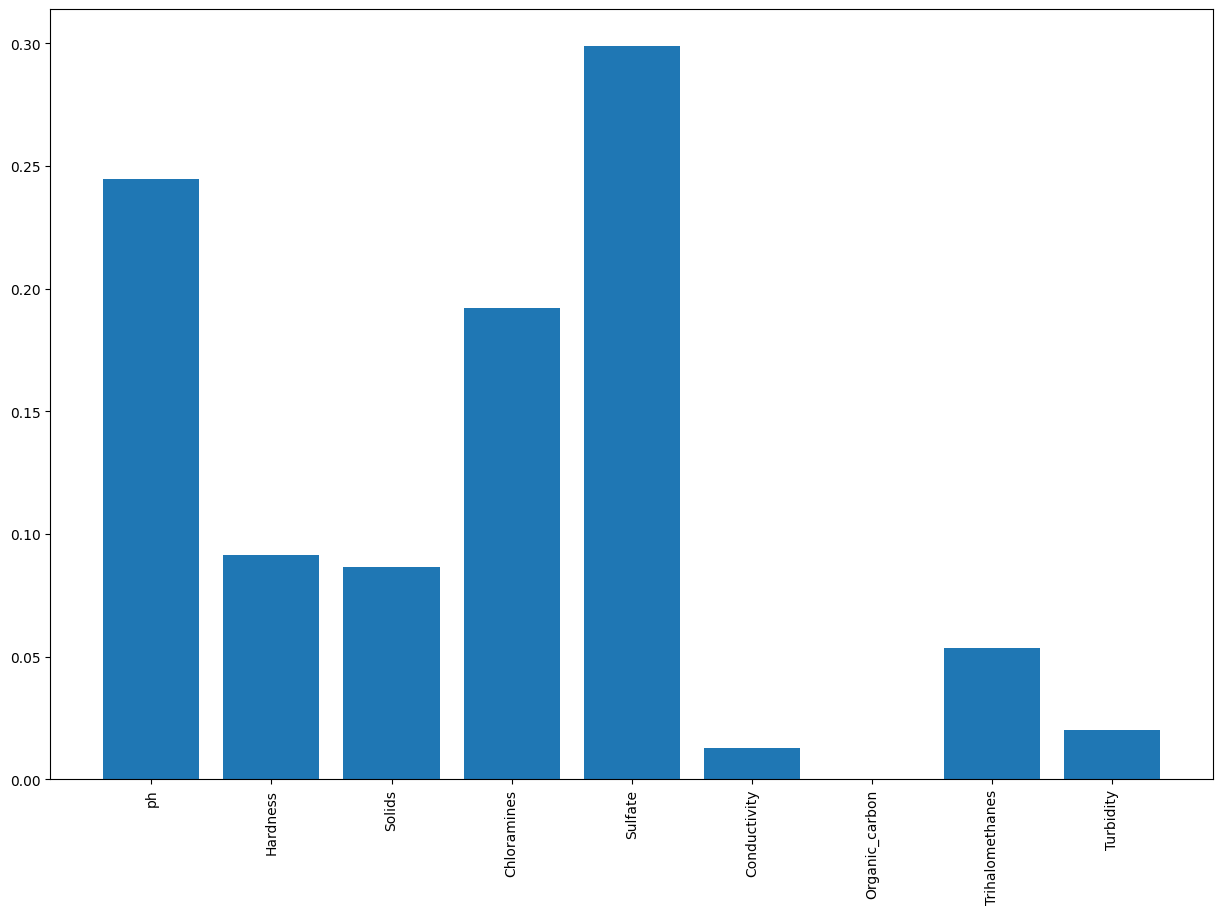

In [15]:
best_parameters = results_df[results_df['test_accuracy'] == results_df['test_accuracy'].max()].iloc[0]

classifier = DecisionTreeClassifier(criterion = best_parameters['criterion'],
                                    max_depth=int(best_parameters['max_depth']),
                                    min_samples_split=int(best_parameters['min_samples_split']),
                                    min_samples_leaf=int(best_parameters['min_samples_leaf']),
                                    max_features=best_parameters['max_features'],
                                    ccp_alpha=best_parameters['ccp_alpha'],
                                    random_state=0)
classifier.fit(x_train, y_train)

important_features = classifier.feature_importances_

plt.figure(figsize=(15,10))
plt.bar(df.columns[:-1], important_features)
plt.xticks(rotation=90)
plt.show()

In [16]:

importance_df = pd.DataFrame({
    'Feature': df.columns[:-1],
    'Importance': important_features
}).sort_values('Importance', ascending=False)

print(importance_df)


           Feature  Importance
4          Sulfate    0.298956
0               ph    0.244768
3      Chloramines    0.191956
1         Hardness    0.091392
2           Solids    0.086400
7  Trihalomethanes    0.053536
8        Turbidity    0.020127
5     Conductivity    0.012864
6   Organic_carbon    0.000000


The 5 most important featres are (in order) Sulfate, PH, Chloramines, Hardness and Solids

## Question 11

A Random Forest can achieve higher accuracy than a single decision tree because it reduces overfitting, it combines multiple different predictions to generate its result and uses different feature subsets in each tree making it more resilient to noise in the data.

## Question 12

In [17]:
rf_parameter_table = {
    'n_estimators': [50, 100, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 3, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': [None, 'sqrt'],
    'ccp_alpha': [0, 0.01],
    'random_state': [0],
    'n_jobs': [-1]
}

rf_parameter_combinations = list(product(*rf_parameter_table.values()))
rf_paramemeter_names = list(rf_parameter_table.keys())

rf_results = []

for i, parameters in enumerate(rf_parameter_combinations):

    rf_parameters_dict = dict(zip(rf_paramemeter_names, parameters))

    rf_classifier = RandomForestClassifier(**rf_parameters_dict)
    rf_classifier.fit(x_train, y_train)

    rf_train_accuracy = accuracy_score(y_train, rf_classifier.predict(x_train))
    rf_test_accuracy = accuracy_score(y_test, rf_classifier.predict(x_test))

    rf_results.append({
        'n_estimators': rf_parameters_dict['n_estimators'],
        'criterion': rf_parameters_dict['criterion'],
        'max_depth': rf_parameters_dict['max_depth'],
        'min_samples_split': rf_parameters_dict['min_samples_split'],
        'min_samples_leaf': rf_parameters_dict['min_samples_leaf'],
        'max_features': rf_parameters_dict['max_features'],
        'ccp_alpha': rf_parameters_dict['ccp_alpha'],
        'train_accuracy': rf_train_accuracy,
        'test_accuracy': rf_test_accuracy
    })

rf_results_df = pd.DataFrame(rf_results)
rf_results_df

,n_estimators,criterion,max_depth,min_samples_split,min_samples_leaf,max_features,ccp_alpha,train_accuracy,test_accuracy
0,50,gini,NaN,2,1,None,0.00,1.000000,0.672431
1,50,gini,NaN,2,1,None,0.01,0.619712,0.626653
2,50,gini,NaN,2,1,sqrt,0.00,1.000000,0.693795
3,50,gini,NaN,2,1,sqrt,0.01,0.605321,0.620549
4,50,gini,NaN,2,2,None,0.00,0.997819,0.669379
...,...,...,...,...,...,...,...,...,...
283,200,entropy,5.0,5,1,sqrt,0.01,0.624509,0.628688
284,200,entropy,5.0,5,2,None,0.00,0.695159,0.660224
285,200,entropy,5.0,5,2,None,0.01,0.646751,0.646999
286,200,entropy,5.0,5,2,sqrt,0.00,0.682948,0.648016


## Question 13

It is preferrable to predict potable water as non-potable than the other way around.

Consuming water falsely predicted as potable can lead to health issues or even death and as such it is by far the higher risk of the two.

Consuming water falsely predicted as non-potable can lead to waste of resources (as perfectly good water is discarded and wasted) but ultimately it is not life threatening.

## Question 14

From a legal POV the Desicion tree is preferrable because even though the prediction of a random forest can be more accurate, it is not interpretable and as such a company cannot explain why a certain body of water was labeled potable or non-potable.